# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# it may not be 623 because the numbers will change everytime its run.

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data. 
# be careful to blow out the use of your API key so use the time.sleep cmd reveiw the Day 1 NY Time video.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities. 
    # will use a request.get
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # pause for 1 second using time.sleep() which avoids the openweather api key from being disabled.
        time.sleep(1)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # go back to Monday's demo to see how to pull this info 11.18.24.
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | nova sintra
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | yabelo
Processing Record 8 of Set 1 | gornozavodsk
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | mbale
Processing Record 12 of Set 1 | el calafate
Processing Record 13 of Set 1 | vavuniya
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | laguna de perlas
Processing Record 18 of Set 1 | invercargill
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | la ronge
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | p

Processing Record 25 of Set 8 | torrington
Processing Record 26 of Set 8 | krutikha
Processing Record 27 of Set 8 | bonavista
Processing Record 28 of Set 8 | zaysan
Processing Record 29 of Set 8 | mana
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | mandera
Processing Record 32 of Set 8 | numan
Processing Record 33 of Set 8 | pingliang
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | bengkulu
Processing Record 38 of Set 8 | honiara
Processing Record 39 of Set 8 | pemba
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | ahipara
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | korla
Processing Record 45 of Set 8 | lerik
Processing Record 46 of Set 8 | quelimane
Processing Record 47 of Set 8 | katyuzhanka
P

Processing Record 14 of Set 12 | nsanje
Processing Record 15 of Set 12 | xuchang
Processing Record 16 of Set 12 | todos santos
Processing Record 17 of Set 12 | kuhestan
City not found. Skipping...
Processing Record 18 of Set 12 | bataipora
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | wajima
Processing Record 21 of Set 12 | pokosnoye
Processing Record 22 of Set 12 | waipawa
Processing Record 23 of Set 12 | yaring
Processing Record 24 of Set 12 | isiro
Processing Record 25 of Set 12 | chivilcoy
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | nicoya
Processing Record 28 of Set 12 | novocheremshansk
Processing Record 29 of Set 12 | emirdag
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | tongliao
Processing Record 32 of Set 12 | ryomgard
Processing Record 33 of Set 12 | khudumelapye
Processing Record 34 of Set 12 | talcahuano
Processing Record 35 of Set 12 | gifhorn
Processing Record 36 of Set 12 | bilma

In [47]:
# Convert the cities weather data into a Pandas DataFrame (pd.dataframe cmd)
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,7.32,78,100,4.61,CA,1732451218
1,grytviken,-54.2811,-36.5092,44.02,87,98,12.68,GS,1732451219
2,atafu village,-8.5421,-172.5159,83.57,71,73,15.70,TK,1732451221
3,nova sintra,14.8667,-24.7167,77.31,76,3,17.63,CV,1732451222
4,bethel,41.3712,-73.4140,44.02,67,60,5.01,US,1732450978


In [49]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,7.32,78,100,4.61,CA,1732451218
1,grytviken,-54.2811,-36.5092,44.02,87,98,12.68,GS,1732451219
2,atafu village,-8.5421,-172.5159,83.57,71,73,15.70,TK,1732451221
3,nova sintra,14.8667,-24.7167,77.31,76,3,17.63,CV,1732451222
4,bethel,41.3712,-73.4140,44.02,67,60,5.01,US,1732450978


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

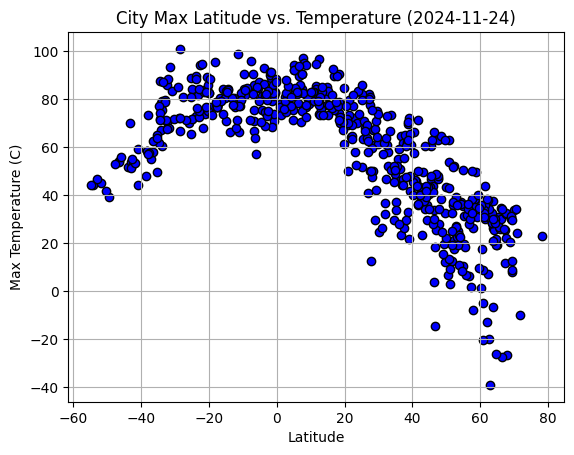

In [51]:
# Build scatter plot for latitude vs. temperature mka
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    color="blue",
    edgecolor="black"
)
    

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot but make sure you use the correct date not what's shown below.
plt.show()

#### Latitude Vs. Humidity

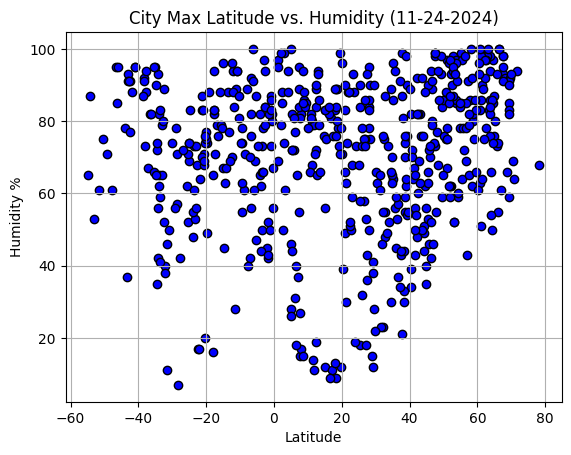

In [52]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color="blue",
    edgecolor="black"
)
    

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

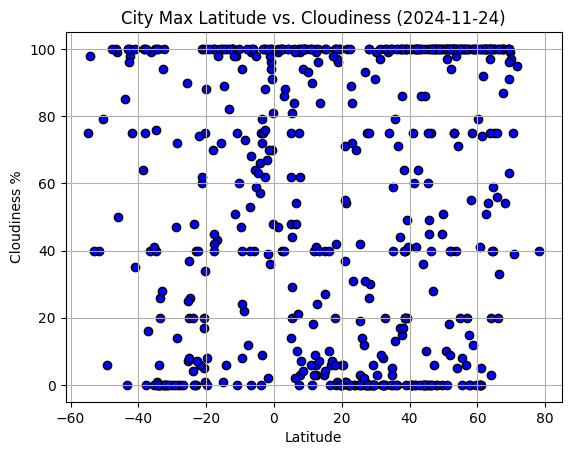

In [53]:
# Build the scatter plots for latitude vs. cloudiness. Use both columns
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    color="blue",
    edgecolor="black"
)
    

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

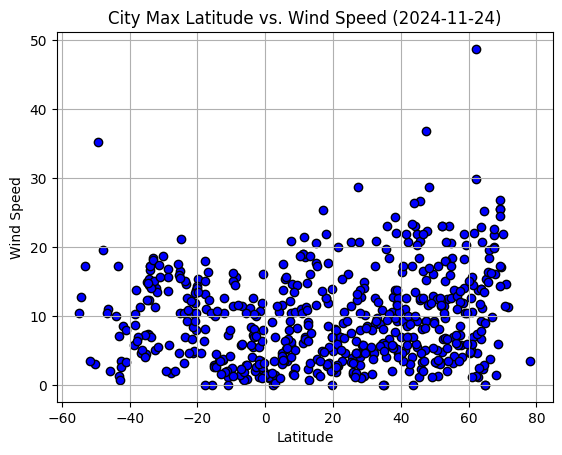

In [54]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    color="blue",
    edgecolor="black"
)
    

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")


# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots. 
# will need to use the pearsonR function. May need to convert to data strings
# YOUR CODE HERE

In [63]:
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    # calc the linear regression
    (slope, intercept,  rvalue, yvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" +str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot the area
    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    plt.show()

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# May need to do a .loc command of our city data.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,7.32,78,100,4.61,CA,1732451218
3,nova sintra,14.8667,-24.7167,77.31,76,3,17.63,CV,1732451222
4,bethel,41.3712,-73.4140,44.02,67,60,5.01,US,1732450978
5,utrik,11.2278,169.8474,82.44,79,100,18.95,MH,1732451224
6,yabelo,4.8833,38.0833,71.11,46,62,11.61,ET,1732451225


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,44.02,87,98,12.68,GS,1732451219
2,atafu village,-8.5421,-172.5159,83.57,71,73,15.70,TK,1732451221
8,hermanus,-34.4187,19.2345,71.73,72,1,14.47,ZA,1732451227
9,port-aux-francais,-49.3500,70.2167,39.27,71,6,35.16,TF,1732451228
11,el calafate,-50.3408,-72.2768,41.67,75,79,3.02,AR,1732451230


###  Temperature vs. Latitude Linear Regression Plot

In [71]:
#print(northern_hemi_df.isnull())
#northern_hemi_df = northern_hemi_df.dropna(subset=["Lat", "Max Temp"])
#print(len(northern_hemi_df["Lat"]), len(northern_hemi_df["Max Temp"]))

393 393


The r-squared value is: 0.7078746568704994


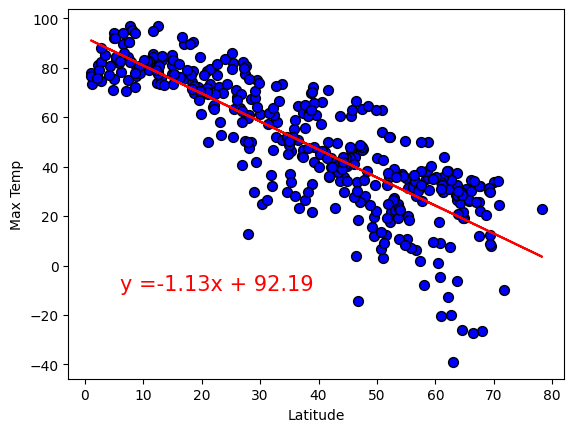

In [72]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10), "blue")


The r-squared value is: 0.40683939702087124


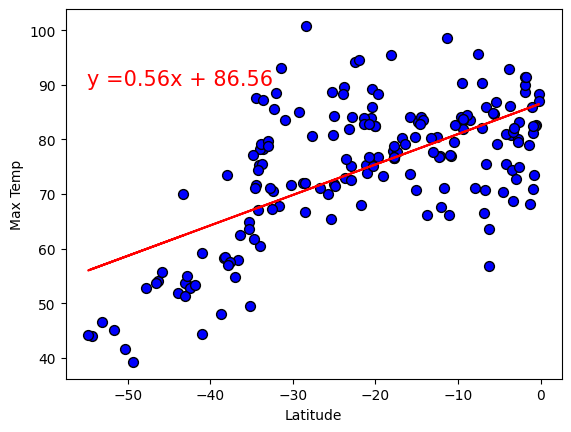

In [76]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,90), "blue")


**Discussion about the linear relationship:**
The higher r value indicates a strong/positive correlation between latitude and temperature. As the r value decreases to 0.4, this is indicating more of a weaker correlation in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.06695198194124843


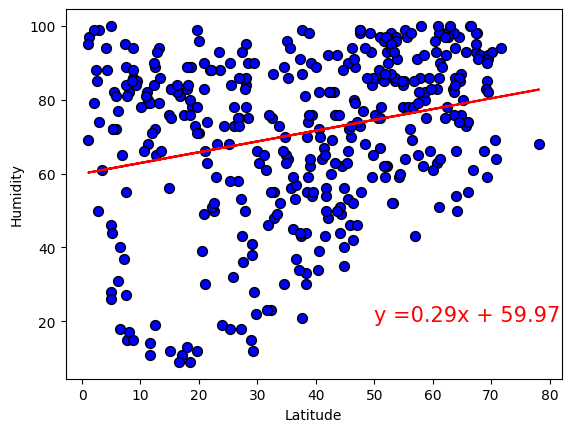

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Humidity", (50,20), "blue")

The r-squared value is: 0.0007042378315266913


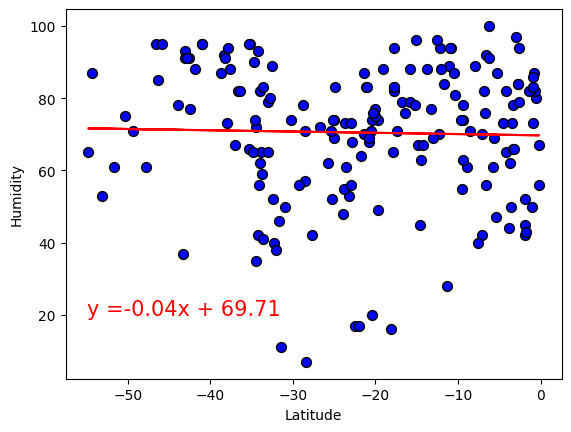

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,20), "blue")

**Discussion about the linear relationship:** The r value indicates a very very weak to no relationship between the humity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.036793424259561426


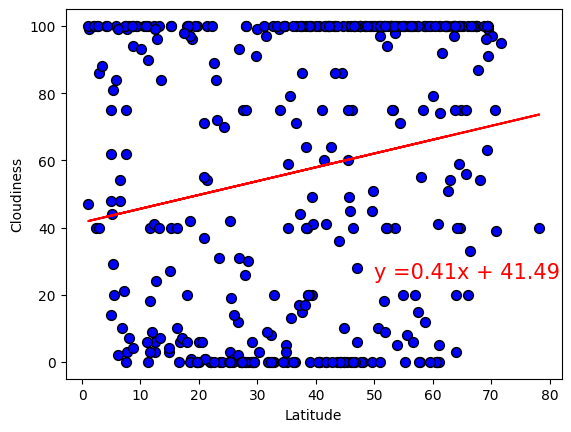

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Cloudiness", (50,25), "blue")

The r-squared value is: 0.030066448052135833


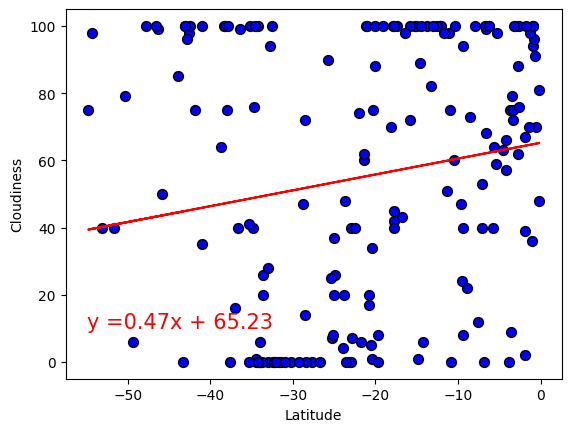

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,10), "blue")

**Discussion about the linear relationship:**  The r value indicates a very very weak to no relationship between the cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.06175956378975703


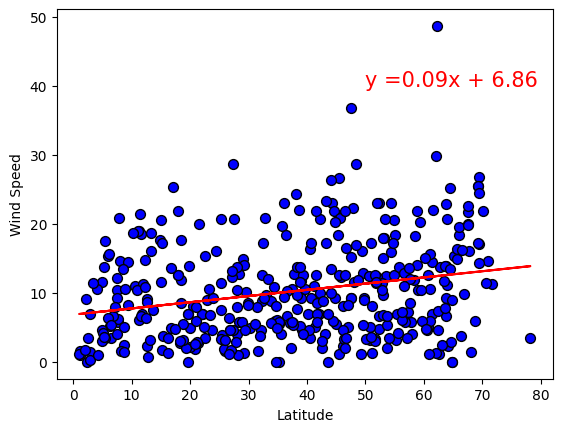

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed", (50,40), "blue")

The r-squared value is: 0.10470429981844245


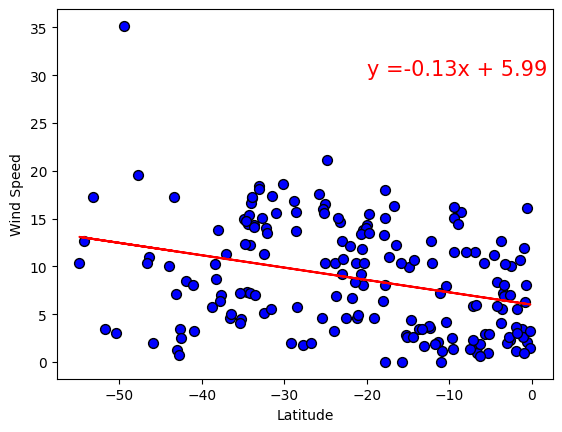

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Wind Speed", (-20,30), "blue")

**Discussion about the linear relationship:** Based on the r value, there is little to no relationship between the Wind Spee and latitude for either region. 